# Practice 5: Classes, objects and exceptions


## Part 1: Figure class

In [ ]:
import math
class Figure:
    
    def perimeter(self):
        pass
    
    def area(self):
        pass


class LengthException(Exception):
    pass


class InvalidTriangleException(Exception):
    pass

In [ ]:
class Rectangle(Figure):
    
    def __init__(self, width, height):
        if width <= 0 or height <= 0:
            raise LengthException('LengthException was raised')
        self.width = width
        self.height = height
        
    def perimeter(self):
        return 2*(self.height + self.width)
    
    def area(self):
        return self.height * self.width
    
    def set_width(self,new_width):
        self.width = new_width
        return None
    
    def set_height(self,new_height):
        self.height = new_height
        return None

In [ ]:
class Circle(Figure):
    
    def __init__(self,radius):
        if radius <= 0:
            raise LengthException('LengthException was raised')
        self.radius = radius
        
    def perimeter(self):
        return round(2 * math.pi * self.radius, 6)
    
    def area(self):
        return round(math.pi * self.radius**2, 6)

In [ ]:
class Triangle(Figure):
    
    def __init__(self, a, b, c):
        if a <= 0 or b <= 0 or c<= 0:
            raise LengthException('LengthException was raised')
        elif not (a + b > c and b + c > a and c + a > b):
            raise InvalidTriangleException('InvalidTriangleException was raised')
        self.a = a
        self.b = b
        self.c = c
        
    def perimeter(self):
        return self.a + self.b + self.c
    
    def area(self):
        p = (self.a + self.b + self.c)/2
        S = math.sqrt(p * (p - self.a) * (p - self.b) * (p - self.c))
        return round(S,6)
    
    def get_height_a(self):
        return self.a
    
    def get_height_b(self):
        return self.b
    
    def get_height_c(self):
        return self.c

In [ ]:
class Square(Rectangle):
    
    def __init__(self,x):
        Rectangle.__init__(self,x,x)
        
    def set_width(self,new):
        self.width = new
        self.height = new
        
    def set_height(self,new):
        self.width = new
        self.height = new

# Part 2: Data analysis in Python

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
class DataPreprocessing:

    def __init__(self):
        self.dataframe = None
        self.X = None
        self.y = None
        
    def read_from_csv(self):
        df = pd.read_csv('real_estate.csv', index_col ='No')
        self.dataframe = df
        display(df.head())

    def set_attributes_and_output(self):
        self.X = self.dataframe.to_numpy()[:,:-1]
        self.y = self.dataframe.to_numpy()[:,-1]
        
    def visualize_data(self):
        columns_plot = self.dataframe.columns.to_numpy()[:-1].reshape(3, -1)
        fig, ax = plt.subplots(3, 2, figsize=(10,8), sharey=True)
        fig.suptitle('Correlation between each attribute and the house price of unit area')
        for i in range(3):
            for j in range(2):
                ax[i,j].scatter(self.X[:,i*2 + j], self.y, s=10, color="bgrcmy"[i*2+j])
                ax[i,j].set_xlabel(columns_plot[i, j].split(' ', 1)[1].title())
        fig.tight_layout()   
        fig.add_subplot(111, frameon=False)
        plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
        plt.ylabel(self.dataframe.columns[-1].split(' ', 1)[1].title())
        plt.show()
        
    def final_train_test_data(self, attribute=[0,1,2,3,4,5], test_size=0.2):
        lst = [self.dataframe.columns[i] for i in attribute]
        X = self.dataframe[lst].to_numpy() 
        y = self.y
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 42)
        return (X_train, X_test, y_train, y_test)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


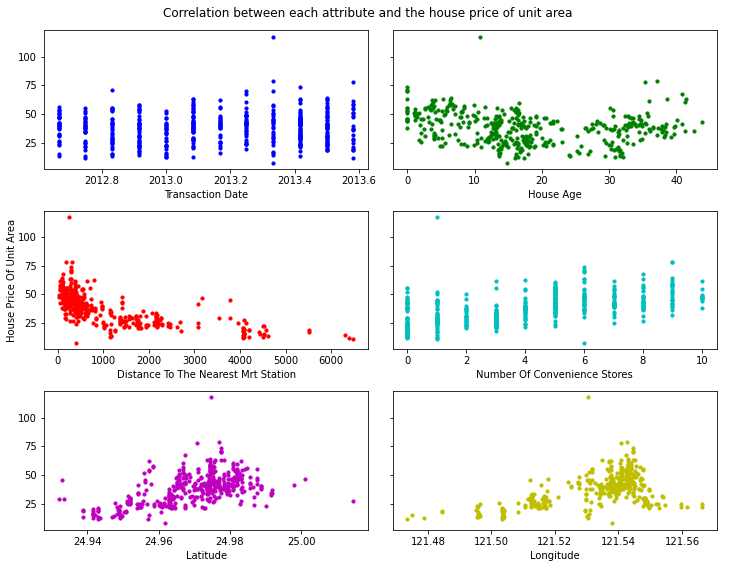

In [7]:
dp = DataPreprocessing()
dp.read_from_csv()
dp.set_attributes_and_output()
dp.visualize_data()

In [9]:
X_train, X_test, y_train, y_test = dp.final_train_test_data([2,4,5])

In [10]:
class BaseClassRegressionAnalysis:
    
    def __init__(self):
        self.regressor = LinearRegression()
    
    def fit(self, X, y):
        self.regressor.fit(X, y)
    
    def predict(self, X):
        return self.regressor.predict(X)
    
    def mean_square_error(self, y_true, y_predict):
        return mean_squared_error(y_true, y_predict)
    
    def visualize_prediction(self, y_real, y_predict):
        x = np.arange(y_real.shape[0])
        fig, ax = plt.subplots(1, 1, figsize=(10,8), sharey=True)  
        fig.suptitle('Visualize real output vs prediction')
        ax.plot(x, y_real, label = 'Real')
        ax.plot(x, y_predict, label = 'Predict')
        ax.legend()
        plt.show()

In [11]:
class LinearRegressionAnalysis(BaseClassRegressionAnalysis):
    pass

In [12]:
class PolynomialRegressionAnalysis(BaseClassRegressionAnalysis):
    
    def __init__(self, degree):
        super().__init__()
        self.degree = degree
    
    def __poly_transform(self, X):
        poly = PolynomialFeatures(degree=self.degree)
        Xt = poly.fit_transform(X)
        return Xt
    
    def fit(self, X, y, degree=2):
        Xt = self.__poly_transform(X)
        super().fit(Xt, y)
        
    def predict(self, X):
        Xt = self.__poly_transform(X)
        return super().predict(Xt)

First 10 instances prediction (rounded to 1 decimal place):      [42.7 40.8 44.7 45.1 30.5 43.8 46.1 46.1 32.9 45.4]
Real output of first 10 instances (rounded to 1 decimal place):  [45.1 42.3 52.2 37.3 22.8 36.3 53.  51.4 16.1 59. ]
Mean square error:  73.2442403892938


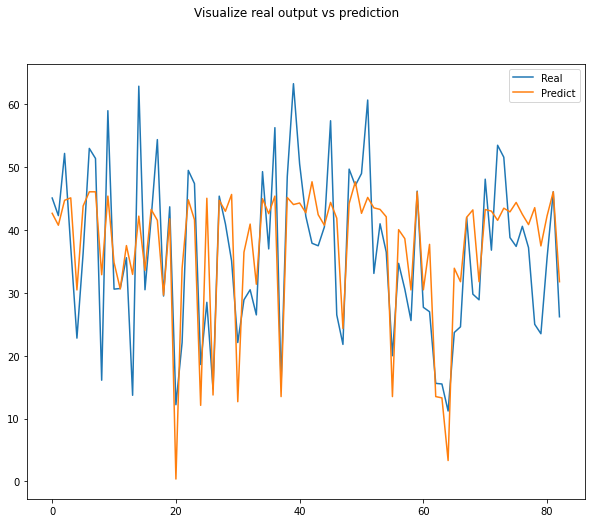

In [13]:
# Step 1: Initialize a regressor (a model) to learn from data
lr = LinearRegressionAnalysis()

# Step 2: The regressor will learn from the input and output of training data
lr.fit(X_train, y_train)

# Step 3: After learning from training data, the model will make a prediction based on input testing data
y_pred = lr.predict(X_test)

# Step 4: Comparision and visualization
print('First 10 instances prediction (rounded to 1 decimal place):     ', np.array([round(i, 1) for i in y_pred[:10]]))
print('Real output of first 10 instances (rounded to 1 decimal place): ', y_test[:10])
print('Mean square error: ', lr.mean_square_error(y_test, y_pred))
lr.visualize_prediction(y_test, y_pred)

First 10 instances prediction (rounded to 1 decimal place): [44.5 40.5 47.2 48.6 22.8 44.8 48.9 48.9 29.7 48.8]
Real output of first 10 instances (rounded to 1 decimal place): [45.1 42.3 52.2 37.3 22.8 36.3 53.  51.4 16.1 59. ]
Mean square error (rounded to 1 decimal place): 63.8


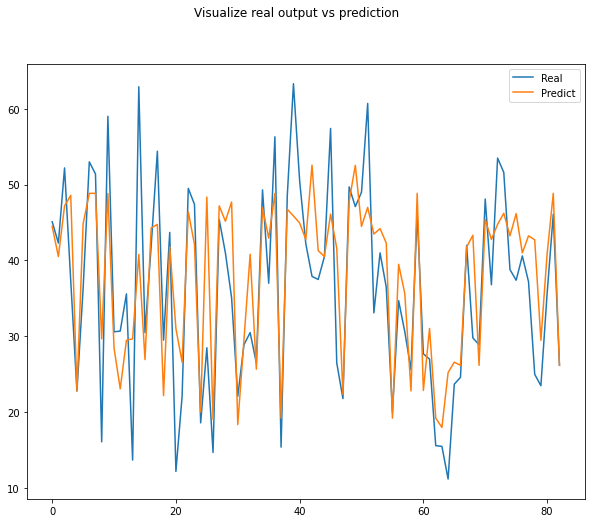

In [16]:
# Step 1: Initialize a regressor (a model) to learn from data

pr = PolynomialRegressionAnalysis(2)

# Step 2: The regressor will learn from the input and output of training data
pr.fit(X_train, y_train)

# Step 3: After learning from training data, the model will make a prediction based on input testing data
y_pred = pr.predict(X_test)

# Step 4: Comparision and visualization
print('First 10 instances prediction (rounded to 1 decimal place):', np.array([round(i, 1) for i in y_pred[:10]]))
print('Real output of first 10 instances (rounded to 1 decimal place):', y_test[:10])
print('Mean square error (rounded to 1 decimal place):', round(pr.mean_square_error(y_test, y_pred),1))
pr.visualize_prediction(y_test, y_pred)